# Importing Required Libraries

In [1]:
import json
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 68938 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
)

Found 17572 files belonging to 38 classes.


# Model Building

In [4]:
cnn = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(128, 128, 3)),
        tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
        tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
        tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
        tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = "relu", padding = "same"),
        tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 1500, activation = "relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(units = 38, activation = "softmax")
    ]
)

### Learning Rate Scheduler

In [5]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 1e-4,
    decay_steps = 10000,
    decay_rate = 0.9,
    staircase = True
)

# Model Compilation

In [6]:
cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [8]:
number_of_epochs = 10

In [9]:
training_log = cnn.fit(
    x = training_set,
    validation_data = validation_set,
    epochs = number_of_epochs,
    shuffle = True
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2017s 918ms/step - accuracy: 0.4151 - loss: 2.0524 - val_accuracy: 0.8508 - val_loss: 0.4793
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2103s 957ms/step - accuracy: 0.8449 - loss: 0.4916 - val_accuracy: 0.9118 - val_loss: 0.2787
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2054s 935ms/step - accuracy: 0.9139 - loss: 0.2693 - val_accuracy: 0.9345 - val_loss: 0.2037
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2020s 919ms/step - accuracy: 0.9398 - loss: 0.1809 - val_accuracy: 0.9459 - val_loss: 0.1727
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2010s 915ms/step - accuracy: 0.9570 - loss: 0.1303 - val_accuracy: 0.9513 - val_loss: 0.1533
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2015s 917ms/step - accuracy: 0.9684 - loss: 0.0950 - val_accuracy: 0.9482 - val_loss: 0.1701
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2023s 921ms/step - accuracy: 0.9764 - loss: 0.0724 - val_accuracy: 0.9680 - val_loss: 0.1013
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2016s 918ms/s

# Model Evaluation

In [22]:
training_loss, training_accuracy = cnn.evaluate(training_set)
print("Training loss: ", training_loss)
print("Training accuracy: ", training_accuracy)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 487s 222ms/step - accuracy: 0.9943 - loss: 0.0180
Training loss:  0.016079789027571678
Training accuracy:  0.9950209856033325


In [23]:
validation_loss, validation_accuracy = cnn.evaluate(validation_set)
print("Validation loss: ", validation_loss)
print("Validation accuracy: ", validation_accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 127s 231ms/step - accuracy: 0.9749 - loss: 0.0921
Validation loss:  0.09280753880739212
Validation accuracy:  0.9737650752067566


# Saving the Model

In [12]:
cnn.save("plant_disease_detection_and_classification.keras")

# Log Recording

In [92]:
with open("training_log.json", "w") as log_file:
  json.dump(training_log.history, log_file)

# Visualization

### Model Accuracy

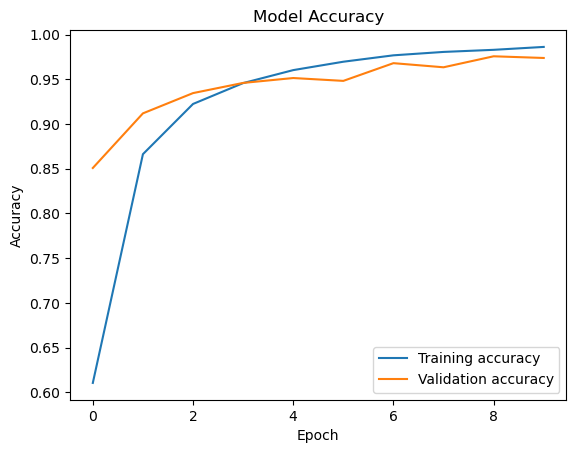

In [19]:
plt.plot(training_log.history["accuracy"], label = "Training accuracy")
plt.plot(training_log.history["val_accuracy"], label = "Validation accuracy")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Model Loss

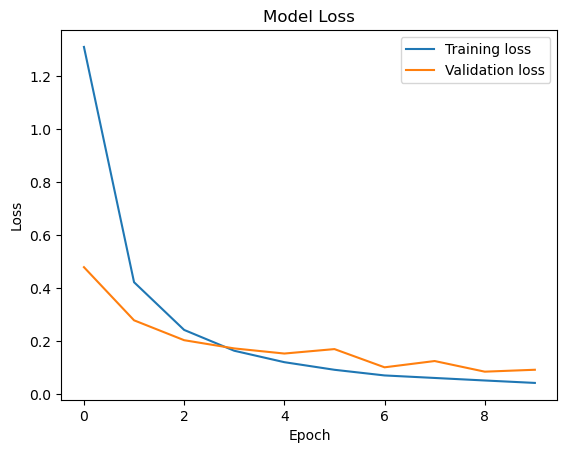

In [20]:
plt.plot(training_log.history["loss"], label = "Training loss")
plt.plot(training_log.history["val_loss"], label = "Validation loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()